In [1]:
#load libraries 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
# reading in the data
df = pd.read_csv('hospital_data.csv')
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [3]:
df.columns = df.columns.str.strip()
df.columns


Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [4]:
df.dtypes




Date                      object
Medication Revenue        object
Lab Cost                  object
Consultation Revenue      object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

In [5]:
# creating datetime columns
df['Date'] = pd.to_datetime(df['Date'])
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'])
df['Entry Time'] = pd.to_datetime(df['Entry Time'])
df['Completion Time'] = pd.to_datetime(df['Completion Time'])

df.dtypes

C:\Users\DDR\AppData\Local\Temp\ipykernel_3900\3269140135.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'])
C:\Users\DDR\AppData\Local\Temp\ipykernel_3900\3269140135.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Entry Time'] = pd.to_datetime(df['Entry Time'])
C:\Users\DDR\AppData\Local\Temp\ipykernel_3900\3269140135.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Completion Time'] = pd.to_datetime(df['Completion Time'])


Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [7]:
# create a cleaning function
def clean_text(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = x.replace('-','')
    x = x.replace(' ','')
    x = pd.to_numeric(x)
    return x
df['Medication Revenue'] = df['Medication Revenue'].apply(clean_text)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 08:35:45,2024-07-17 09:17:54,2024-07-17 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 19:19:16,2024-07-17 21:02:36,2024-07-17 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 10:46:52,2024-07-17 11:56:25,2024-07-17 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,2024-07-17 09:38:34,2024-07-17 10:55:50,2024-07-17 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 11:16:21,2024-07-17 12:06:49,2024-07-17 12:06:54,DR15154H4,C10005


In [8]:
# Changing the dtypes
df['Consultation Revenue'] = df['Consultation Revenue'].apply(clean_text)
df['Lab Cost'] = df['Lab Cost'].apply(clean_text)
df.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [9]:
#creat total revenue column
df['Total Revenue'] = df['Medication Revenue']+ df['Consultation Revenue'] + df['Lab Cost']
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 08:35:45,2024-07-17 09:17:54,2024-07-17 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 19:19:16,2024-07-17 21:02:36,2024-07-17 21:24:07,DR09451Z4,C10002,NaN
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 10:46:52,2024-07-17 11:56:25,2024-07-17 12:06:28,DR17400I4,C10003,NaN
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2024-07-17 09:38:34,2024-07-17 10:55:50,2024-07-17 10:58:02,DR09451Z4,C10004,NaN
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 11:16:21,2024-07-17 12:06:49,2024-07-17 12:06:54,DR15154H4,C10005,NaN


In [10]:
#fill NANs
df = df.fillna(0)

In [11]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 08:35:45,2024-07-17 09:17:54,2024-07-17 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 19:19:16,2024-07-17 21:02:36,2024-07-17 21:24:07,DR09451Z4,C10002,0.00
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 10:46:52,2024-07-17 11:56:25,2024-07-17 12:06:28,DR17400I4,C10003,0.00
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2024-07-17 09:38:34,2024-07-17 10:55:50,2024-07-17 10:58:02,DR09451Z4,C10004,0.00
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 11:16:21,2024-07-17 12:06:49,2024-07-17 12:06:54,DR15154H4,C10005,0.00


# What time has the most visitors



In [12]:
df['Entry Hour'] =df['Entry Time'].dt.hour
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 08:35:45,2024-07-17 09:17:54,2024-07-17 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 19:19:16,2024-07-17 21:02:36,2024-07-17 21:24:07,DR09451Z4,C10002,0.00,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2024-07-17 10:46:52,2024-07-17 11:56:25,2024-07-17 12:06:28,DR17400I4,C10003,0.00,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2024-07-17 09:38:34,2024-07-17 10:55:50,2024-07-17 10:58:02,DR09451Z4,C10004,0.00,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2024-07-17 11:16:21,2024-07-17 12:06:49,2024-07-17 12:06:54,DR15154H4,C10005,0.00,11


In [13]:
#grouping by Hour
pivot1 =df.groupby(df['Entry Hour'])['Patient ID'].count()
pivot1

Entry Hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

<Axes: xlabel='Entry Hour'>

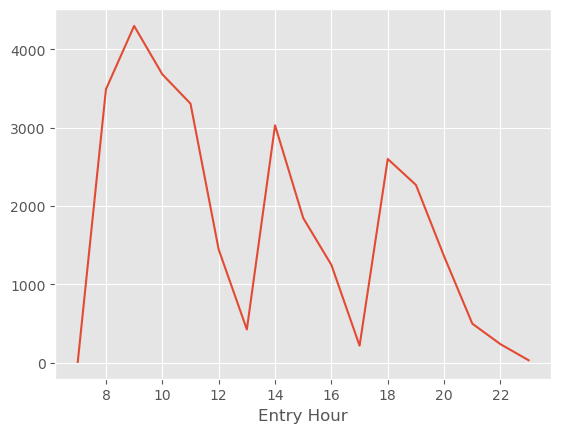

In [14]:
plt.style.use('ggplot')
pivot1 =df.groupby(df['Entry Hour'])['Patient ID'].count()
df.groupby(df['Entry Hour'])['Patient ID'].count().plot()

# Does the Total Revenue Correlate with the Total Visitors?


<Axes: xlabel='Entry Hour'>

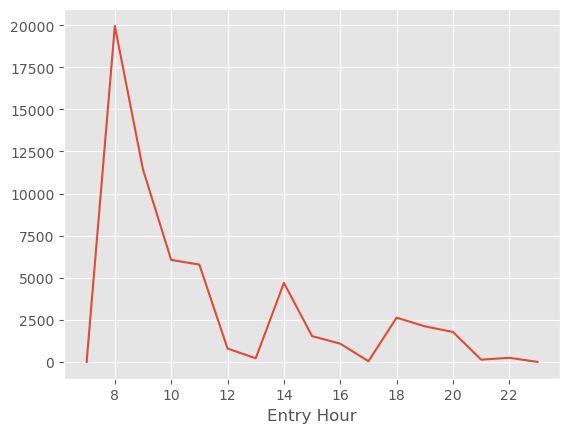

In [16]:
pivot2 =df.groupby(df['Entry Hour'])['Total Revenue'].sum()
df.groupby(df['Entry Hour'])['Total Revenue'].sum().plot()

In [23]:
pivot3  =df.groupby(df['Entry Hour']).sum(numeric_only=True)
pivot4  =df.groupby(df['Entry Hour']).count()
merge = pivot3.merge(pivot4, on='Entry Hour')
merge.head()

,Medication Revenue_x,Lab Cost_x,Consultation Revenue_x,Total Revenue_x,Date,Medication Revenue_y,Lab Cost_y,Consultation Revenue_y,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue_y
Entry Hour,,,,,,,,,,,,,,,,,
7,350.66,520.00,198.63,0.00,12,12,12,12,12,12,12,12,12,12,12,12,12
8,83404.62,22475.27,51180.15,19959.28,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489
9,96195.61,14879.28,60216.56,11429.42,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
10,75239.66,6688.98,52072.67,6060.60,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680
11,72675.83,6860.23,48192.03,5780.90,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306


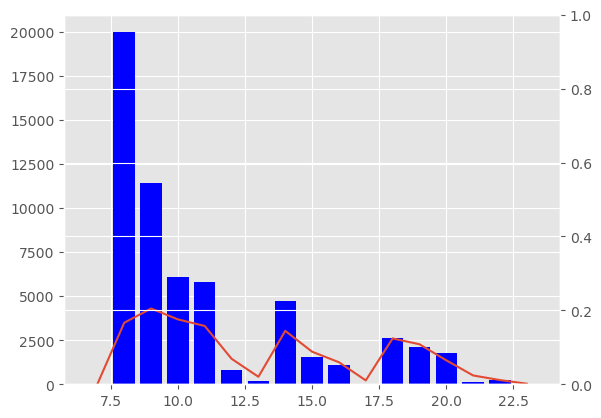

In [24]:
fig, ax1 = plt.subplots()
ax2 =ax1.twinx()
ax1.bar(merge.index,merge['Total Revenue_x'],color='blue')
ax1.plot(merge.index,merge['Patient ID'])

# What percentage of revenue come from different Insurance types?


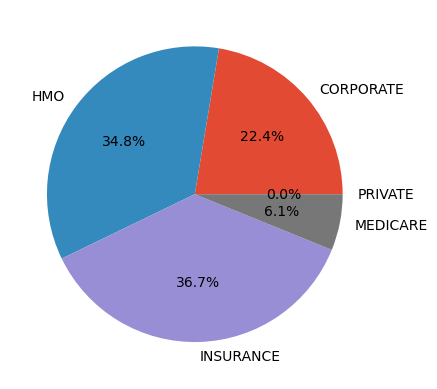

In [21]:
pivot5  = df.groupby('Financial Class').sum(numeric_only=True)
plt.pie(pivot5['Total Revenue'],labels=pivot5.index,autopct='%1.1f%%');